In [37]:
import pandas as pd

In [38]:
# Für Kritische Konzentration
# Messung bei 60min - Expoentiell

Konzentration_MM = [1, 2.5, 4, 5]

Rollzeit_tM_Messreihe1_s = [1.48, 4.98, 9.01, 29.1]
Strecke_s_Messreihe1_cm = [7, 7, 1, 1]

Rollzeit_tM_Messreihe2_s = [1.26, 4.71, 11.68, 29.45]
Strecke_s_Messreihe2_cm = [7, 7, 1, 1]

Winkel_phi_Messreihe_deg = [45, 45, 60, 75]

In [39]:
Konzentration_Fehler_MM = [0.05, 0.125, 0.2, 0.25] #!!! # 5%

Zeit_t0_Messreihe1_Fehler_min = []
Rollzeit_tM_Messreihe1_Fehler_s = []
Strecke_s_Messreihe1_Fehler_cm = []

Zeit_t0_Messreihe2_Fehler_min = []
Rollzeit_tM_Messreihe2_Fehler_s = []
Strecke_s_Messreihe2_Fehler_cm = []

Winkel_phi_Messreihe_Fehler_deg = [1, 1, 1, 1, 1, 1, 1, 1, 1]

In [40]:
import pandas as pd
import numpy as np

df_raw = pd.DataFrame({
    "Konzentration_MM": Konzentration_MM,
    "Rollzeit_tM_Messreihe1_s": Rollzeit_tM_Messreihe1_s,
    "Strecke_s_Messreihe1_cm": Strecke_s_Messreihe1_cm,
    "Rollzeit_tM_Messreihe2_s": Rollzeit_tM_Messreihe2_s,
    "Strecke_s_Messreihe2_cm": Strecke_s_Messreihe2_cm,
    "Winkel_phi_Messreihe_deg": Winkel_phi_Messreihe_deg,
})

print(df_raw)

   Konzentration_MM  Rollzeit_tM_Messreihe1_s  Strecke_s_Messreihe1_cm  \
0               1.0                      1.48                        7   
1               2.5                      4.98                        7   
2               4.0                      9.01                        1   
3               5.0                     29.10                        1   

   Rollzeit_tM_Messreihe2_s  Strecke_s_Messreihe2_cm  Winkel_phi_Messreihe_deg  
0                      1.26                        7                        45  
1                      4.71                        7                        45  
2                     11.68                        1                        60  
3                     29.45                        1                        75  


# Fehler

In [41]:
# 2.1 Fehler der Strecke berechnen
import math
from typing import Union

Number = Union[int, float]

def streckenunsicherheit(b: Number) -> float:
    """
    Berechnet die Typ-B-Standardunsicherheit der Strecke bei Rechteckverteilung.

    Annahme:
      - b ist die geschätzte maximale Abweichung (±b) der Strecke (gleiche Einheit wie die Strecke).
      - Rechteckverteilung => u(s) = b / sqrt(3)

    Parameter
    ----------
    b : int | float
        Maximale Abweichung (±b), z.B. b=0.2 für ±0.2 mm.

    Returns
    -------
    float
        Standardunsicherheit u(s) in derselben Einheit wie b.
    """
    if b < 0:
        raise ValueError("b muss >= 0 sein (maximale Abweichung als Betrag).")
    return b/ math.sqrt(3)

b = 0.2  # cm (entspricht ±0.2 mm)
strecken_error_cm = streckenunsicherheit(b)
print(f"strecken_error_cm: {strecken_error_cm} cm")

Strecke_s_Messreihe1_Fehler_cm = [strecken_error_cm] * 4
Strecke_s_Messreihe2_Fehler_cm = [strecken_error_cm] * 4
print("Strecke_s_Messreihe1_Fehler_cm:", Strecke_s_Messreihe1_Fehler_cm)
print("Strecke_s_Messreihe2_Fehler_cm:", Strecke_s_Messreihe2_Fehler_cm)

strecken_error_cm: 0.11547005383792516 cm
Strecke_s_Messreihe1_Fehler_cm: [0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516]
Strecke_s_Messreihe2_Fehler_cm: [0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516]


In [42]:
# 2.2 Fehler der Rollzeit berechnen
import math

def rollzeitunsicherheit(a_s: float) -> float:
    """
    Berechnet die Typ-B-Standardunsicherheit der Rollzeit bei manueller Stopuhrmessung.

    Annahmen:
    - a_s: maximale Abweichung (±a) der Reaktionszeit pro Klick in Sekunden
    - Zwei unabhängige Klicks: Start und Stop
    - Rechteckverteilung pro Klick

    Formel:
    u(t_M) = sqrt(2) * a / sqrt(3)

    Rückgabe:
    - Unsicherheit in Sekunden
    """
    if a_s < 0:
        raise ValueError("a muss positiv sein.")
    return math.sqrt(2) * a_s / math.sqrt(3)

a = 1  # Sekunden (±1 s Reaktionszeit pro Klick)

u_t = rollzeitunsicherheit(a)
print("Rollzeit-Unsicherheit u(t_M):")
print(f"u(t_M) = {u_t:.4f} s")

Rollzeit_tM_Messreihe1_Fehler_s = [u_t] * 4
Rollzeit_tM_Messreihe2_Fehler_s = [u_t] * 4
print("Rollzeit_tM_Messreihe1_Fehler_s:", Rollzeit_tM_Messreihe1_Fehler_s)
print("Rollzeit_tM_Messreihe2_Fehler_s:", Rollzeit_tM_Messreihe2_Fehler_s)

Rollzeit-Unsicherheit u(t_M):
u(t_M) = 0.8165 s
Rollzeit_tM_Messreihe1_Fehler_s: [0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261]
Rollzeit_tM_Messreihe2_Fehler_s: [0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261]


In [43]:
# 2.3 Fehler des Winkel berechnen
import math

def winkelunsicherheit_typ_b(c_deg: float) -> float:
    """
    Typ-B-Standardunsicherheit eines Winkels bei Rechteckverteilung.
    c_deg: maximale Abweichung in Grad (z.B. 1 für ±1°)

    Rückgabe:
    - Unsicherheit in Radiant
    """
    c_rad = math.radians(c_deg)
    return c_rad / math.sqrt(3)


# Beispiel:
u_phi = winkelunsicherheit_typ_b(1.0)
print(u_phi)  # ≈ 0.0101 rad

import math

def rad2deg(x_rad: float) -> float:
    return x_rad * 180.0 / math.pi

def deg2rad(x_deg: float) -> float:
    return x_deg * math.pi / 180.0


# Beispiel:
u_phi_rad = 0.0101
print(f"rad2deg(u_phi_rad): {rad2deg(u_phi_rad)}°")  # ≈ 0.579°

Winkel_phi_Messreihe_Fehler_deg = [rad2deg(u_phi)] * 4
print("Winkel_phi_Messreihe1_Fehler_deg:", Winkel_phi_Messreihe_Fehler_deg)    

Winkel_phi_Messreihe_Fehler_rad = [u_phi] * 4
print("Winkel_phi_Messreihe2_Fehler_rad:", Winkel_phi_Messreihe_Fehler_rad)


0.010076663134634544
rad2deg(u_phi_rad): 0.5786873730821314°
Winkel_phi_Messreihe1_Fehler_deg: [0.5773502691896258, 0.5773502691896258, 0.5773502691896258, 0.5773502691896258]
Winkel_phi_Messreihe2_Fehler_rad: [0.010076663134634544, 0.010076663134634544, 0.010076663134634544, 0.010076663134634544]


In [55]:
cols = {
    "Konzentration_MM": Konzentration_MM,
    "Konzentration_Fehler_MM": Konzentration_Fehler_MM,
    "Rollzeit_tM_Messreihe1_s": Rollzeit_tM_Messreihe1_s,
    "Rollzeit_tM_Messreihe1_Fehler_s": Rollzeit_tM_Messreihe1_Fehler_s,
    "Strecke_s_Messreihe1_cm": Strecke_s_Messreihe1_cm,
    "Strecke_s_Messreihe1_Fehler_cm": Strecke_s_Messreihe1_Fehler_cm,
    "Rollzeit_tM_Messreihe2_s": Rollzeit_tM_Messreihe2_s,
    "Rollzeit_tM_Messreihe2_Fehler_s": Rollzeit_tM_Messreihe2_Fehler_s,
    "Strecke_s_Messreihe2_cm": Strecke_s_Messreihe2_cm,
    "Strecke_s_Messreihe2_Fehler_cm": Strecke_s_Messreihe2_Fehler_cm,
    "Winkel_phi_Messreihe_deg": Winkel_phi_Messreihe_deg,
    "Winkel_phi_Messreihe_Fehler_deg": Winkel_phi_Messreihe_Fehler_deg,
    "Winkel_phi_Messreihe_Fehler_rad": Winkel_phi_Messreihe_Fehler_rad,
}

for k, v in cols.items():
    try:
        print(f"{k:35s} len={len(v)}")
    except TypeError:
        print(f"{k:35s} ist kein Array/Listentyp (Typ: {type(v)})")

Konzentration_MM                    len=4
Konzentration_Fehler_MM             len=4
Rollzeit_tM_Messreihe1_s            len=4
Rollzeit_tM_Messreihe1_Fehler_s     len=4
Strecke_s_Messreihe1_cm             len=4
Strecke_s_Messreihe1_Fehler_cm      len=4
Rollzeit_tM_Messreihe2_s            len=4
Rollzeit_tM_Messreihe2_Fehler_s     len=4
Strecke_s_Messreihe2_cm             len=4
Strecke_s_Messreihe2_Fehler_cm      len=4
Winkel_phi_Messreihe_deg            len=4
Winkel_phi_Messreihe_Fehler_deg     len=4
Winkel_phi_Messreihe_Fehler_rad     len=4


In [66]:
df = pd.DataFrame({
    "Konzentration_MM": Konzentration_MM,
    "Konzentration_Fehler_MM": Konzentration_Fehler_MM,
    "Rollzeit_tM_Messreihe1_s": Rollzeit_tM_Messreihe1_s,
    "Rollzeit_tM_Messreihe1_Fehler_s": Rollzeit_tM_Messreihe1_Fehler_s,
    "Strecke_s_Messreihe1_cm": Strecke_s_Messreihe1_cm,
    "Strecke_s_Messreihe1_Fehler_cm": Strecke_s_Messreihe1_Fehler_cm,
    "Rollzeit_tM_Messreihe2_s": Rollzeit_tM_Messreihe2_s,
    "Rollzeit_tM_Messreihe2_Fehler_s": Rollzeit_tM_Messreihe2_Fehler_s,
    "Strecke_s_Messreihe2_cm": Strecke_s_Messreihe2_cm,
    "Strecke_s_Messreihe2_Fehler_cm": Strecke_s_Messreihe2_Fehler_cm,
    "Winkel_phi_Messreihe_deg": Winkel_phi_Messreihe_deg,
    "Winkel_phi_Messreihe_Fehler_deg": Winkel_phi_Messreihe_Fehler_deg,
    "Winkel_phi_Messreihe_Fehler_rad": Winkel_phi_Messreihe_Fehler_rad,
})


print(df)

   Konzentration_MM  Konzentration_Fehler_MM  Rollzeit_tM_Messreihe1_s  \
0               1.0                    0.050                      1.48   
1               2.5                    0.125                      4.98   
2               4.0                    0.200                      9.01   
3               5.0                    0.250                     29.10   

   Rollzeit_tM_Messreihe1_Fehler_s  Strecke_s_Messreihe1_cm  \
0                         0.816497                        7   
1                         0.816497                        7   
2                         0.816497                        1   
3                         0.816497                        1   

   Strecke_s_Messreihe1_Fehler_cm  Rollzeit_tM_Messreihe2_s  \
0                         0.11547                      1.26   
1                         0.11547                      4.71   
2                         0.11547                     11.68   
3                         0.11547                     29.45  

# Geschwindigkeit u

In [67]:
# 3.1 u
df["u1_cm_s"] = df["Strecke_s_Messreihe1_cm"] / df["Rollzeit_tM_Messreihe1_s"]
df["u2_cm_s"] = df["Strecke_s_Messreihe2_cm"] / df["Rollzeit_tM_Messreihe2_s"]
print(df)

   Konzentration_MM  Konzentration_Fehler_MM  Rollzeit_tM_Messreihe1_s  \
0               1.0                    0.050                      1.48   
1               2.5                    0.125                      4.98   
2               4.0                    0.200                      9.01   
3               5.0                    0.250                     29.10   

   Rollzeit_tM_Messreihe1_Fehler_s  Strecke_s_Messreihe1_cm  \
0                         0.816497                        7   
1                         0.816497                        7   
2                         0.816497                        1   
3                         0.816497                        1   

   Strecke_s_Messreihe1_Fehler_cm  Rollzeit_tM_Messreihe2_s  \
0                         0.11547                      1.26   
1                         0.11547                      4.71   
2                         0.11547                     11.68   
3                         0.11547                     29.45  

In [68]:
# 3.2 Fehler von u berechnen
def geschw_unsicherheit(s, t, us, ut):
    return np.sqrt( (us / t)**2 + (s * ut / t**2)**2 )

df["u1_Fehler_cm_s"] = geschw_unsicherheit(
    df["Strecke_s_Messreihe1_cm"],
    df["Rollzeit_tM_Messreihe1_s"],
    df["Strecke_s_Messreihe1_Fehler_cm"],
    df["Rollzeit_tM_Messreihe1_Fehler_s"],
)

df["u2_Fehler_cm_s"] = geschw_unsicherheit(
    df["Strecke_s_Messreihe2_cm"],
    df["Rollzeit_tM_Messreihe2_s"],
    df["Strecke_s_Messreihe2_Fehler_cm"],
    df["Rollzeit_tM_Messreihe2_Fehler_s"],
)
print (df)

   Konzentration_MM  Konzentration_Fehler_MM  Rollzeit_tM_Messreihe1_s  \
0               1.0                    0.050                      1.48   
1               2.5                    0.125                      4.98   
2               4.0                    0.200                      9.01   
3               5.0                    0.250                     29.10   

   Rollzeit_tM_Messreihe1_Fehler_s  Strecke_s_Messreihe1_cm  \
0                         0.816497                        7   
1                         0.816497                        7   
2                         0.816497                        1   
3                         0.816497                        1   

   Strecke_s_Messreihe1_Fehler_cm  Rollzeit_tM_Messreihe2_s  \
0                         0.11547                      1.26   
1                         0.11547                      4.71   
2                         0.11547                     11.68   
3                         0.11547                     29.45  

In [69]:
# 3.3 Gemittelte Geschwindigkeit
df["u_mittel_cm_s"] = 0.5 * (df["u1_cm_s"] + df["u2_cm_s"])

In [70]:
# 3.4 Fehler der gemittelten Geschwindigkeit
df["u_mittel_Fehler_cm_s"] = 0.5 * np.sqrt(
    df["u1_Fehler_cm_s"]**2 + df["u2_Fehler_cm_s"]**2
)
print(df)

   Konzentration_MM  Konzentration_Fehler_MM  Rollzeit_tM_Messreihe1_s  \
0               1.0                    0.050                      1.48   
1               2.5                    0.125                      4.98   
2               4.0                    0.200                      9.01   
3               5.0                    0.250                     29.10   

   Rollzeit_tM_Messreihe1_Fehler_s  Strecke_s_Messreihe1_cm  \
0                         0.816497                        7   
1                         0.816497                        7   
2                         0.816497                        1   
3                         0.816497                        1   

   Strecke_s_Messreihe1_Fehler_cm  Rollzeit_tM_Messreihe2_s  \
0                         0.11547                      1.26   
1                         0.11547                      4.71   
2                         0.11547                     11.68   
3                         0.11547                     29.45  

In [71]:
df[[
    "Konzentration_MM", "Konzentration_Fehler_MM",
    "u1_cm_s", "u1_Fehler_cm_s",
    "u2_cm_s", "u2_Fehler_cm_s",
    "u_mittel_cm_s", "u_mittel_Fehler_cm_s"
]]

,Konzentration_MM,Konzentration_Fehler_MM,u1_cm_s,u1_Fehler_cm_s,u2_cm_s,u2_Fehler_cm_s,u_mittel_cm_s,u_mittel_Fehler_cm_s
0,1.0,0.050,4.729730,2.610496,5.555556,3.601239,5.142643,2.223939
1,2.5,0.125,1.405622,0.231623,1.486200,0.258802,1.445911,0.173657
2,4.0,0.200,0.110988,0.016291,0.085616,0.011557,0.098302,0.009987
3,5.0,0.250,0.034364,0.004084,0.033956,0.004032,0.034160,0.002869


# Viskosität

In [72]:
# Viskosität
import math

def viscosity_formula_4_1(
    K: float,               # Korrekturfaktor
    roh_fluid: float,       # g/cm^3
    roh_kugel: float,       # g/cm^3
    phi_deg: float,         # Grad
    d_kapillare_cm: float,  # cm
    d_kugel_cm: float,      # cm
    g_cm_s2: float,         # cm/s^2
    velocity_cm_s: float    # cm/s
) -> float:
    """
    Formel 4.1 in cgs-Einheiten (cm, s, g).
    Rückgabe: Viskosität in mPa*s.
    """
    if velocity_cm_s <= 0:
        raise ValueError("velocity_cm_s muss > 0 sein.")

    phi_rad = math.radians(phi_deg)

    # entspricht deinem 'numerator'
    prefactor = (5.0 * math.pi / 42.0) * K
    numerator = prefactor * (d_kugel_cm ** 2) * roh_fluid * g_cm_s2 * math.sin(phi_rad)

    # entspricht deinem 'correction'
    correction = ((roh_kugel - roh_fluid) / roh_fluid) * ((d_kapillare_cm + d_kugel_cm) / d_kugel_cm)

    # Viskosität in Poise (g/(cm*s))
    eta_poise = (numerator * correction) / velocity_cm_s

    # 1 Poise = 0.1 Pa*s = 100 mPa*s
    eta_mPa_s = eta_poise * 100.0
    return eta_mPa_s

In [73]:
def constant_C_cgs(
    K: float,
    roh_fluid: float,
    roh_kugel: float,
    d_kapillare_cm: float,
    d_kugel_cm: float,
    g_cm_s2: float
) -> float:
    """
    C so, dass gilt: eta_poise = (C * sin(phi)) / u   (u in cm/s, phi in rad)
    Rückgabe: C in (Poise * cm/s) = g/(cm*s) * cm/s = g/cm
    """
    prefactor = (5.0 * math.pi / 42.0) * K
    correction = ((roh_kugel - roh_fluid) / roh_fluid) * ((d_kapillare_cm + d_kugel_cm) / d_kugel_cm)
    C = prefactor * (d_kugel_cm ** 2) * roh_fluid * g_cm_s2 * correction
    return C

In [74]:
# Konstanten aus deinem Screenshot
K = 0.000583
d_kugel_cm = 0.06
g_cm_s2 = 9.81 * 100
roh_water = 1.0
roh_kugel = 7.85

# d_kapillare_cm aus deiner Rechnung (hier als Beispielwert einsetzen)
d_kapillare_cm = 0.11894160774351809

# eta (mPa*s) aus gemittelter Geschwindigkeit
df["eta_mPa_s"] = df.apply(
    lambda r: viscosity_formula_4_1(
        K=K,
        roh_fluid=roh_water,
        roh_kugel=roh_kugel,
        phi_deg=r["Winkel_phi_Messreihe_deg"],
        d_kapillare_cm=d_kapillare_cm,
        d_kugel_cm=d_kugel_cm,
        g_cm_s2=g_cm_s2,
        velocity_cm_s=r["u_mittel_cm_s"],
    ),
    axis=1
)


In [75]:
# 4.2 Viskositätsfehlerberechnung
import numpy as np

def eta_uncertainty_from_C(u_bar, du_bar, phi_deg, dphi_deg, C):
    phi = np.deg2rad(phi_deg)
    dphi = np.deg2rad(dphi_deg)

    term_phi = (C * np.cos(phi) / u_bar * dphi) ** 2
    term_u   = (C * np.sin(phi) / (u_bar**2) * du_bar) ** 2

    # Ergebnis in Poise; danach in mPa*s
    d_eta_poise = np.sqrt(term_phi + term_u)
    return d_eta_poise * 100.0

C = constant_C_cgs(K, roh_water, roh_kugel, d_kapillare_cm, d_kugel_cm, g_cm_s2)

df["eta_Fehler_mPa_s"] = eta_uncertainty_from_C(
    df["u_mittel_cm_s"].to_numpy(),
    df["u_mittel_Fehler_cm_s"].to_numpy(),
    df["Winkel_phi_Messreihe_deg"].to_numpy(),
    df["Winkel_phi_Messreihe_Fehler_deg"].to_numpy(),
    C
)

In [86]:
df[[
    "Konzentration_MM", "Konzentration_Fehler_MM",
    "u_mittel_cm_s", "u_mittel_Fehler_cm_s",
    "eta_mPa_s", "eta_Fehler_mPa_s",
    "Winkel_phi_Messreihe_deg", "Winkel_phi_Messreihe_Fehler_deg"

]]

,Konzentration_MM,Konzentration_Fehler_MM,u_mittel_cm_s,u_mittel_Fehler_cm_s,eta_mPa_s,eta_Fehler_mPa_s,Winkel_phi_Messreihe_deg,Winkel_phi_Messreihe_Fehler_deg
0,1.0,0.050,5.142643,2.223939,0.216302,0.093565,45,0.57735
1,2.5,0.125,1.445911,0.173657,0.769316,0.092721,45,0.57735
2,4.0,0.200,0.098302,0.009987,13.858910,1.410302,60,0.57735
3,5.0,0.250,0.034160,0.002869,44.482221,3.738425,75,0.57735


In [78]:
print(df)

   Konzentration_MM  Konzentration_Fehler_MM  Rollzeit_tM_Messreihe1_s  \
0               1.0                    0.050                      1.48   
1               2.5                    0.125                      4.98   
2               4.0                    0.200                      9.01   
3               5.0                    0.250                     29.10   

   Rollzeit_tM_Messreihe1_Fehler_s  Strecke_s_Messreihe1_cm  \
0                         0.816497                        7   
1                         0.816497                        7   
2                         0.816497                        1   
3                         0.816497                        1   

   Strecke_s_Messreihe1_Fehler_cm  Rollzeit_tM_Messreihe2_s  \
0                         0.11547                      1.26   
1                         0.11547                      4.71   
2                         0.11547                     11.68   
3                         0.11547                     29.45  

# Plotting

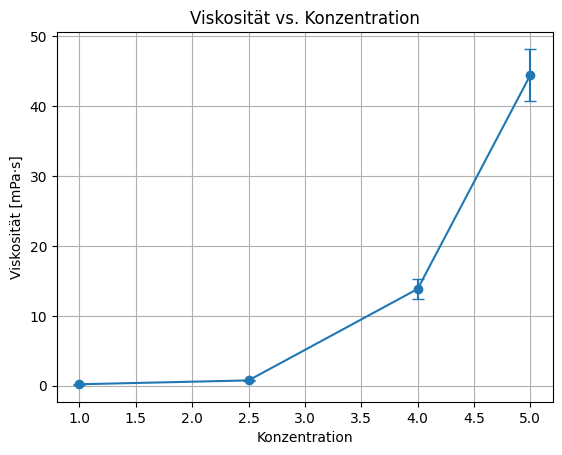

In [81]:
import matplotlib.pyplot as plt

# Plot
plt.figure()
plt.errorbar(
    df["Konzentration_MM"],
    df["eta_mPa_s"],
    yerr=df["eta_Fehler_mPa_s"],
    fmt="o-",
    capsize=4
)
plt.xlabel("Konzentration")
plt.ylabel("Viskosität [mPa·s]")
plt.title("Viskosität vs. Konzentration")
plt.grid(True)

plt.show()

Fitparameter:
a = 1.580987e-02 ± 3.512181e-03
b = 1.603050e+00 ± 5.232630e-02


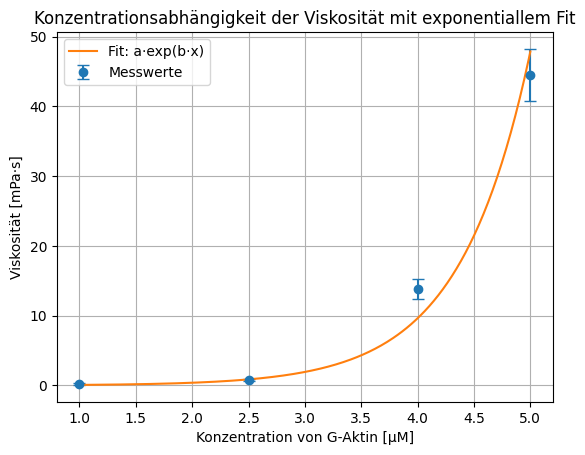

R^2 = 0.977346


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Daten
concentration = df["Konzentration_MM"]
viscosity = df["eta_mPa_s"]
viscosity_err = df["eta_Fehler_mPa_s"]

# Exponentialfunktion definieren
def expo(x, a, b):
    return a * np.exp(b * x)

# Fit
popt, pcov = curve_fit(expo, concentration, viscosity, sigma=viscosity_err, absolute_sigma=True)
a_fit, b_fit = popt
a_err, b_err = np.sqrt(np.diag(pcov))

print("Fitparameter:")
print(f"a = {a_fit:.6e} ± {a_err:.6e}")
print(f"b = {b_fit:.6e} ± {b_err:.6e}")

# Fitkurve erzeugen
x_fit = np.linspace(min(concentration), max(concentration), 300)
y_fit = expo(x_fit, a_fit, b_fit)

# Plot
plt.figure()
plt.errorbar(concentration, viscosity, yerr=viscosity_err, fmt="o", capsize=4, label="Messwerte")
plt.plot(x_fit, y_fit, label=f"Fit: a·exp(b·x)")

plt.xlabel("Konzentration von G-Aktin [µM]")
plt.ylabel("Viskosität [mPa·s]")
plt.title("Konzentrationsabhängigkeit der Viskosität mit exponentiallem Fit")
plt.grid(True)
plt.legend()

plt.show()

# R^2 berechnen
y_pred = expo(concentration, a_fit, b_fit)

ss_res = np.sum((viscosity - y_pred)**2)
ss_tot = np.sum((viscosity - np.mean(viscosity))**2)

r2 = 1 - (ss_res / ss_tot)

print(f"R^2 = {r2:.6f}")

Fitparameter:
a = 1.580987e-02 ± 3.512181e-03
b = 1.603050e+00 ± 5.232630e-02
R^2 = 0.977346


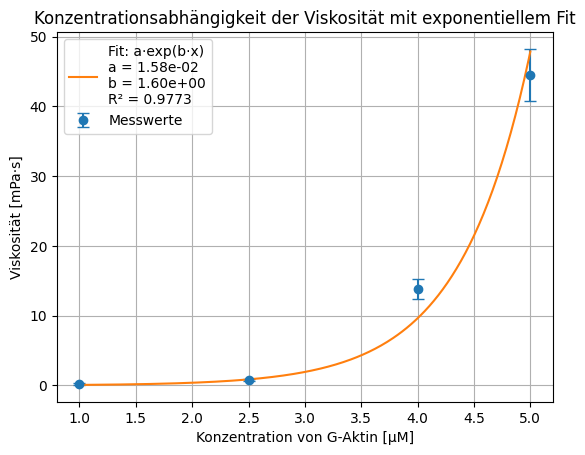

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Daten
concentration = df["Konzentration_MM"]
viscosity = df["eta_mPa_s"]
viscosity_err = df["eta_Fehler_mPa_s"]

# Exponentialfunktion definieren
def expo(x, a, b):
    return a * np.exp(b * x)

# Fit
popt, pcov = curve_fit(expo, concentration, viscosity, sigma=viscosity_err, absolute_sigma=True)
a_fit, b_fit = popt
a_err, b_err = np.sqrt(np.diag(pcov))

print("Fitparameter:")
print(f"a = {a_fit:.6e} ± {a_err:.6e}")
print(f"b = {b_fit:.6e} ± {b_err:.6e}")

# Fitkurve erzeugen
x_fit = np.linspace(min(concentration), max(concentration), 300)
y_fit = expo(x_fit, a_fit, b_fit)

# R^2 berechnen
y_pred = expo(concentration, a_fit, b_fit)
ss_res = np.sum((viscosity - y_pred)**2)
ss_tot = np.sum((viscosity - np.mean(viscosity))**2)
r2 = 1 - (ss_res / ss_tot)
print(f"R^2 = {r2:.6f}")

# Plot
plt.figure()

plt.errorbar(concentration, viscosity, yerr=viscosity_err,
             fmt="o", capsize=4, label="Messwerte")

# Fitparameter gerundet
a_round = float(f"{a_fit:.2e}")
b_round = float(f"{b_fit:.2e}")
r2_round = float(f"{r2:.4f}")

fit_label = (
    "Fit: a·exp(b·x)\n"
    f"a = {a_round:.2e}\n"
    f"b = {b_round:.2e}\n"
    f"R² = {r2_round:.4f}"
)


plt.plot(x_fit, y_fit, label=fit_label)

plt.xlabel("Konzentration von G-Aktin [µM]")
plt.ylabel("Viskosität [mPa·s]")
plt.title("Konzentrationsabhängigkeit der Viskosität mit exponentiellem Fit")
plt.grid(True)
plt.legend()

plt.show()

Fitparameter:
a = 1.580987e-02 ± 3.512181e-03
b = 1.603050e+00 ± 5.232630e-02
R^2 = 0.977346


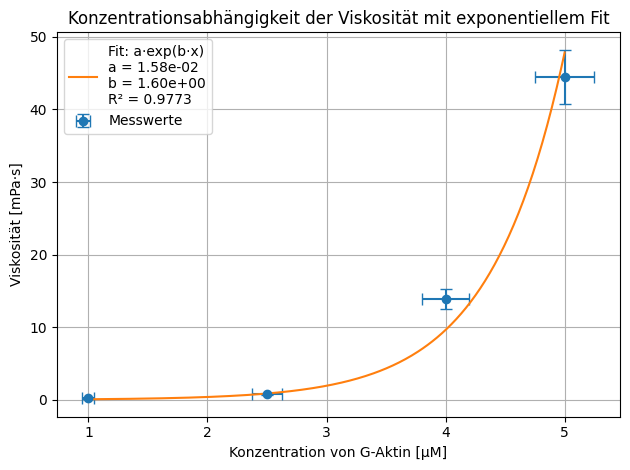

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Daten
concentration = df["Konzentration_MM"].to_numpy(float)
concentration_err = df["Konzentration_Fehler_MM"].to_numpy(float)

viscosity = df["eta_mPa_s"].to_numpy(float)
viscosity_err = df["eta_Fehler_mPa_s"].to_numpy(float)

# Exponentialfunktion definieren
def expo(x, a, b):
    return a * np.exp(b * x)

# Fit (nur y-Fehler werden von curve_fit berücksichtigt!)
popt, pcov = curve_fit(
    expo,
    concentration,
    viscosity,
    sigma=viscosity_err,
    absolute_sigma=True
)

a_fit, b_fit = popt
a_err, b_err = np.sqrt(np.diag(pcov))

print("Fitparameter:")
print(f"a = {a_fit:.6e} ± {a_err:.6e}")
print(f"b = {b_fit:.6e} ± {b_err:.6e}")

# Fitkurve erzeugen
x_fit = np.linspace(min(concentration), max(concentration), 300)
y_fit = expo(x_fit, a_fit, b_fit)

# R^2 berechnen
y_pred = expo(concentration, a_fit, b_fit)
ss_res = np.sum((viscosity - y_pred)**2)
ss_tot = np.sum((viscosity - np.mean(viscosity))**2)
r2 = 1 - (ss_res / ss_tot)
print(f"R^2 = {r2:.6f}")

# Plot
plt.figure()

plt.errorbar(
    concentration,
    viscosity,
    xerr=concentration_err,     # <-- HIER die x-Fehler
    yerr=viscosity_err,
    fmt="o",
    capsize=4,
    label="Messwerte"
)

# Fitparameter gerundet
a_round = float(f"{a_fit:.2e}")
b_round = float(f"{b_fit:.2e}")
r2_round = float(f"{r2:.4f}")

fit_label = (
    "Fit: a·exp(b·x)\n"
    f"a = {a_round:.2e}\n"
    f"b = {b_round:.2e}\n"
    f"R² = {r2_round:.4f}"
)

plt.plot(x_fit, y_fit, label=fit_label)

plt.xlabel("Konzentration von G-Aktin [µM]")
plt.ylabel("Viskosität [mPa·s]")
plt.title("Konzentrationsabhängigkeit der Viskosität mit exponentiellem Fit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
